In [221]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import warnings


In [222]:
#warnings.filterwarnings("ignore")

In [223]:
# Import data
school_data = pd.read_csv('https://raw.githubusercontent.com/SaneSky109/DATA620/main/Data/High-School_data_2013.csv',
                          sep = ' ',
                         header = None,
                         names = ["Time_sec", "StudentID1", "StudentID2", "Class1", "Class2"])


In [224]:
attribute_data = pd.read_csv('http://www.sociopatterns.org/wp-content/uploads/2015/09/metadata_2013.txt',
                   sep = '\t',
                   header = None,
                   names = ["studentID", "Class", "Gender"])
attribute_data.head(5)

,studentID,Class,Gender
0,650,2BIO1,F
1,498,2BIO1,F
2,627,2BIO1,F
3,857,2BIO1,F
4,487,2BIO1,F


In [225]:
# Create Weights. Students can contact eachother multiple times in a class. Weights can capture how often the students communicate.
weighted_data = school_data.groupby(['StudentID1', 'StudentID2']).size().reset_index(name="Contacts")

# Create weights using 1/contacts to have people who are more social with eachother closer than people who hardly socialize with eachother
weighted_data["weight"] = 1 / weighted_data["Contacts"]

weighted_data.head(5)

,StudentID1,StudentID2,Contacts,weight
0,1,55,8,0.125000
1,1,63,2,0.500000
2,1,101,1,1.000000
3,1,106,4,0.250000
4,1,117,18,0.055556


In [226]:
zip_iter = zip(attribute_data['studentID'].tolist(), attribute_data['Gender'].tolist())
a_dict = dict(zip_iter)

In [227]:
#g = nx.DiGraph()
#g.add_nodes_from(attribute_data['studentID'])
#for key,n in g.nodes.items():
#    n["Gender"]=a_dict[key]

In [228]:
#g.nodes(data=True)

In [229]:
g = nx.from_pandas_edgelist(weighted_data, 
                            source='StudentID1', 
                            target='StudentID2', 
                            create_using = nx.MultiDiGraph(),
                            edge_attr = ["Contacts", "weight"]
                           ) 

In [230]:
for key,n in g.nodes.items():
    n["Gender"]=a_dict[key]

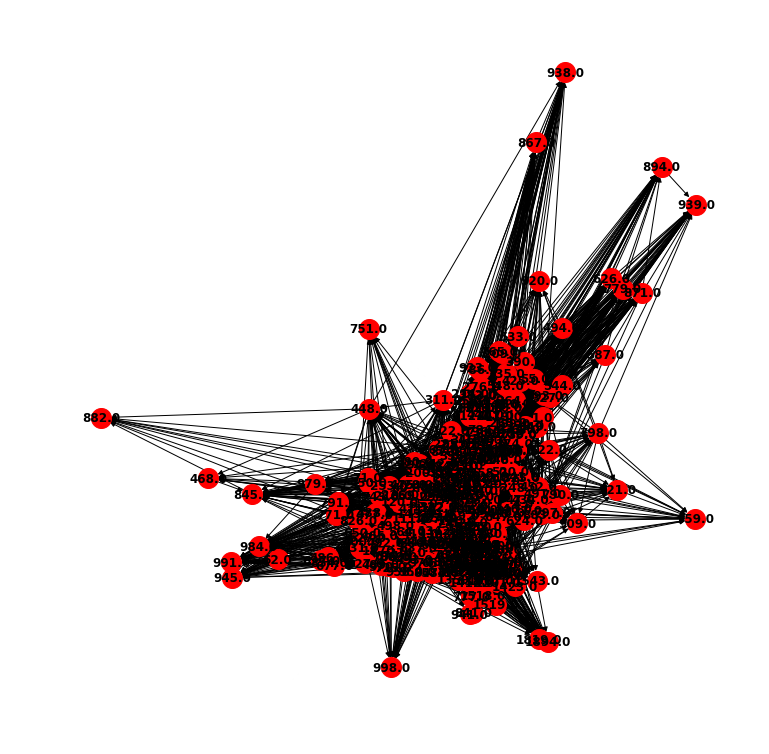

In [232]:
plt.figure(figsize = (10,10))
nx.draw(g, with_labels = True, node_size = 400, font_color = 'black', font_weight = 'bold')

In [234]:
sub_g = nx.Graph(((source, target, attr) 
                for source, target, attr in g.edges(data=True) 
                    if attr['weight'] < 0.01))

In [241]:
sub_g = nx.subgraph(g,
                    ((source) for source, target, attr in g.edges(data=True) 
                    if attr['weight'] < 0.01))

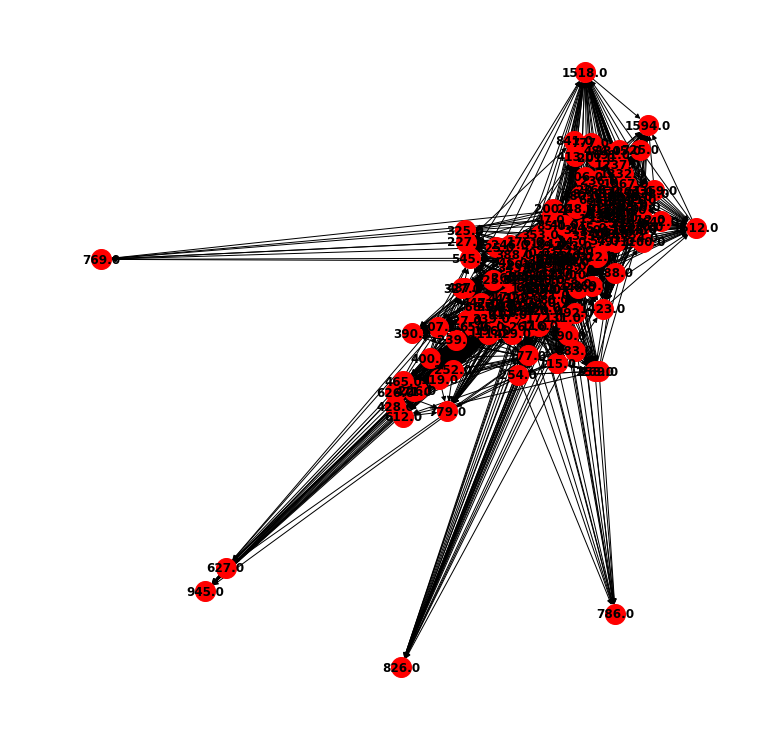

In [242]:
plt.figure(figsize = (10,10))
nx.draw(sub_g, with_labels = True, node_size = 400, font_color = 'black', font_weight = 'bold')

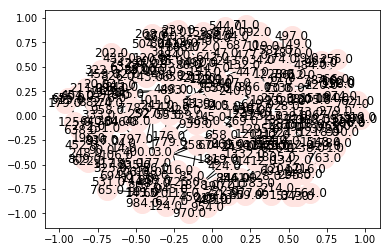

In [236]:
#pos=nx.spring_layout(sub_g,k=0.05,seed=42)
pos=nx.spring_layout(sub_g,k=0.05)
nx.draw_networkx(sub_g,
                   pos,
                   with_labels=True,
                   node_size=400,
                   node_color="mistyrose",
                   #edgelist=edges, 
                   #edge_color=weights,
                   edge_cmap=plt.cm.Blues_r,
                   style="solid",
                   width=1)

NodeDataView({1.0: {'Gender': 'M'}, 513.0: {'Gender': 'M'}, 3.0: {'Gender': 'M'}, 4.0: {'Gender': 'M'}, 9.0: {'Gender': 'M'}, 14.0: {'Gender': 'M'}, 15.0: {'Gender': 'M'}, 20.0: {'Gender': 'M'}, 21.0: {'Gender': 'M'}, 27.0: {'Gender': 'M'}, 28.0: {'Gender': 'M'}, 32.0: {'Gender': 'M'}, 545.0: {'Gender': 'F'}, 34.0: {'Gender': 'Unknown'}, 38.0: {'Gender': 'M'}, 39.0: {'Gender': 'F'}, 41.0: {'Gender': 'Unknown'}, 1067.0: {'Gender': 'M'}, 45.0: {'Gender': 'F'}, 46.0: {'Gender': 'F'}, 47.0: {'Gender': 'F'}, 564.0: {'Gender': 'M'}, 54.0: {'Gender': 'M'}, 55.0: {'Gender': 'F'}, 58.0: {'Gender': 'Unknown'}, 1594.0: {'Gender': 'F'}, 61.0: {'Gender': 'F'}, 63.0: {'Gender': 'F'}, 65.0: {'Gender': 'M'}, 582.0: {'Gender': 'M'}, 71.0: {'Gender': 'M'}, 72.0: {'Gender': 'F'}, 70.0: {'Gender': 'F'}, 80.0: {'Gender': 'F'}, 85.0: {'Gender': 'F'}, 89.0: {'Gender': 'M'}, 90.0: {'Gender': 'M'}, 92.0: {'Gender': 'M'}, 605.0: {'Gender': 'M'}, 612.0: {'Gender': 'F'}, 101.0: {'Gender': 'F'}, 106.0: {'Gender': 